## Model prediksi titik panas di Sumatera Selatan 2001 - 2023

In [1]:
# lib manipulation data
import numpy as np
import pandas as pd

# load all functions
from C01_data_collection import *
from C02_visualization import *
from C03_preprocessing import *
from C04_model_predictions import *

- config models

In [2]:
# set random number
import tensorflow as tf
tf.random.set_seed(1234)

In [3]:
# set parameter
batch_size=4
epochs=1500
activation = "selu"
dropout_rate = 0.25
optimizer = "sgd"

### 1. Akuisisi Data

In [4]:
# load dataset
dataset = data_hotspot()
print(dataset.tail())

      acq_date  hotspot
271 2023-08-31      186
272 2023-09-30     2247
273 2023-10-31     3200
274 2023-11-30      390
275 2023-12-31       42


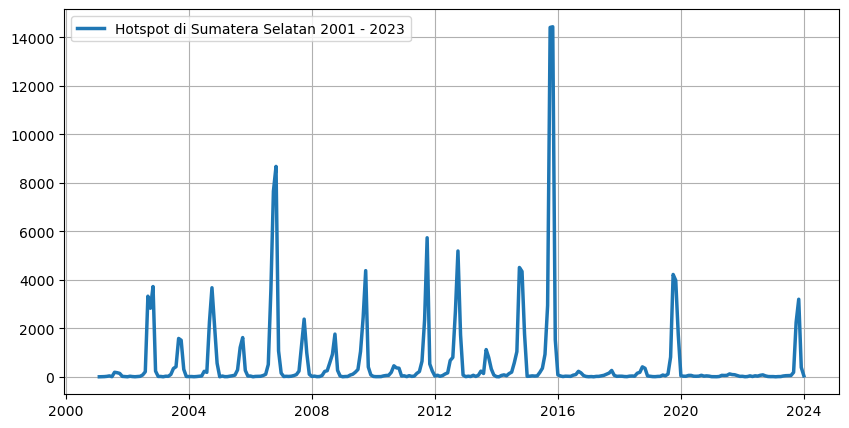

In [5]:
# hasil load dataset
lineplot1(dataset["acq_date"], dataset["hotspot"], "Hotspot di Sumatera Selatan 2001 - 2023")

### 2. Praproses Data

In [6]:
# proses normalisasi min-max
scaled = normalized(dataset, ["hotspot"])

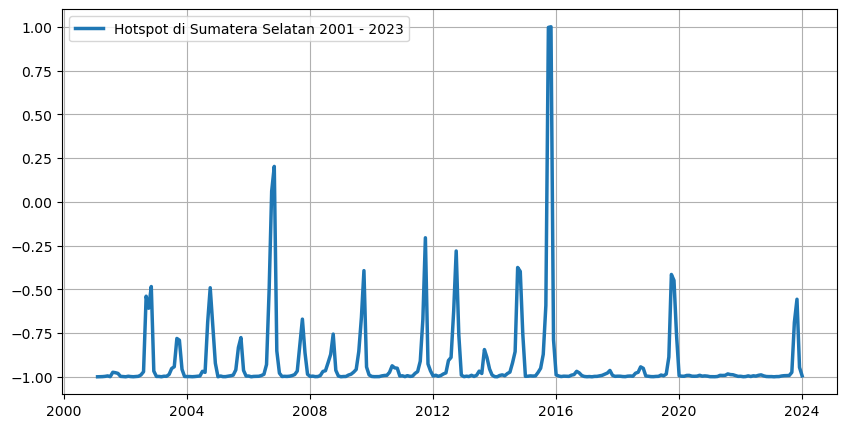

In [7]:
# hasil normalisasi min-max
lineplot1(dataset["acq_date"], np.array(scaled), "Hotspot di Sumatera Selatan 2001 - 2023")

### 3. Pembagian Data

In [8]:
# proses pembagian data
train_data, test_data = splitting(scaled)

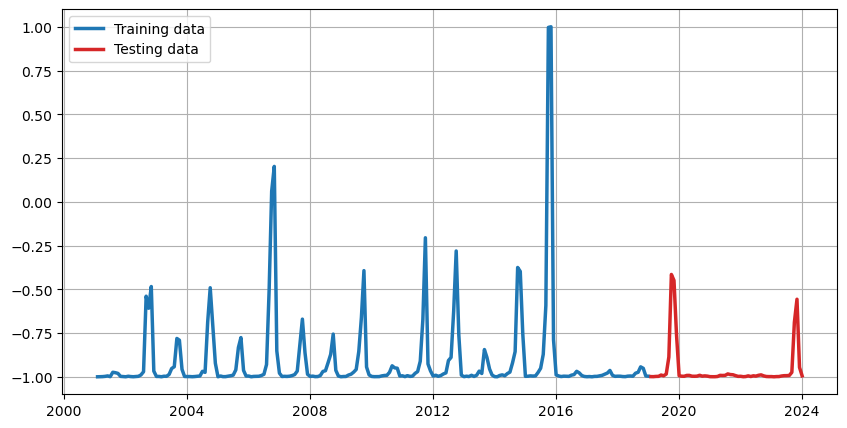

In [9]:
# hasil pembagian data
lineplot2(
  x1=dataset.iloc[0:len(train_data),0], y1=train_data, label1="Training data",
  x2=dataset.iloc[len(train_data):len(dataset),0], y2=test_data, label2="Testing data",
)

### 4. Supervised Learning

In [10]:
# function for supervised learning
x_train, y_train, x_test, y_test = results_supervised_learning(train_data, test_data)

In [11]:
# cek dimensi data
print(x_train.shape, y_train.shape)

(215, 1, 1) (215,)


In [12]:
# cek dimensi data
print(x_test.shape, y_test.shape)

(59, 1, 1) (59,)


### 5.1 Modeling SBi-LSTM

In [13]:
# call model LSTM
model = get_lstm(
  timestep=x_train.shape[1],
  activation="selu",
  dropout=0.15,
  optimizer="sgd"
)

In [14]:
model